<a href="https://colab.research.google.com/github/lpasquini24/LinearAlgebraFinalProject/blob/main/Luca_Pasquini_Astrella_Brown_Copy_of_linear_transform_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Goal__ Implement linear transformation on image

In [ ]:
import math
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sympy import *

Load the image

- First, you shall download an image from https://github.com/songqsh/ma2071_v01/blob/master/src/wpilogo.png to your local drive
- and upload the image file to this cloud server by clicking the folder icon on left panel in colab

In [ ]:
ls

sample_data/


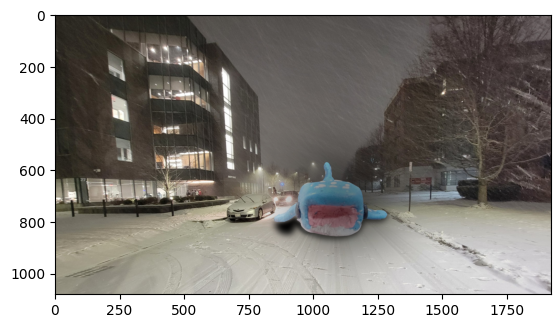

In [ ]:
# IMPORT AND SHOW THE INITIAL IMAGE
# Define the image file path
image_path = "/content/sample_data/shark.jpg"
# Load the image
image = Image.open(image_path)
plt.imshow(image)
plt.show()

# Convert the image as a numpy array
image_np = np.array(image)

In [ ]:
def image_tranform(image_np, linear_transform):
  # Get the dimensions of the image
  height, width, channels = image_np.shape

  # Define the center
  center_x = width / 2
  center_y = height / 2

  # Loop through each pixel in the image and apply the transformation
  transformed_image = np.zeros_like(image_np)

  for y in range(height):
      for x in range(width):
          # Translate the pixel to the origin
          translated_x = x - center_x
          translated_y = -(y - center_y)

          # Apply the transformation: matrix vector multiplication
          transformed_x, transformed_y = linear_transform@np.array([translated_x, translated_y])

          # Translate the pixel back to its original position
          transformed_x += center_x
          transformed_y = - transformed_y + center_y

          # Round the pixel coordinates to integers
          transformed_x = int(round(transformed_x))
          transformed_y = int(round(transformed_y))

          # Copy the pixel to the transformed image
          if (transformed_x >= 0 and transformed_x < width and
              transformed_y >= 0 and transformed_y < height):
              transformed_image[transformed_y, transformed_x] = image_np[y, x]

  return transformed_image


In [ ]:
"""
TUTORIAL CODE
print(f'The dimension of the image_np is {image_np.shape}')
# Define the transformatin matrix
mat = np.array([
    [.5, 1],
    [0, 1]
])
# apply transform
"""

"""
EXAMPLE PRINTING
new_image_np = image_tranform(image_np, mat)
# convert a numpy array to image
new_image = Image.fromarray(new_image_np)
plt.imshow(new_image)
"""

'\nEXAMPLE PRINTING\nnew_image_np = image_tranform(image_np, mat)\n# convert a numpy array to image\nnew_image = Image.fromarray(new_image_np)\nplt.imshow(new_image)\n'

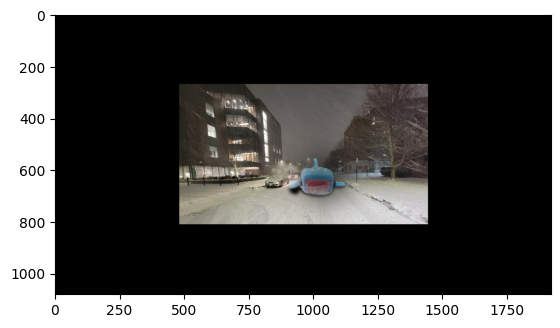

In [ ]:
# PART 1

# TRANSFORMATION MATRIX FOR PART 1
"""
STANDARD MATRIX IS:
[0.5 0]
[0 0.5]
"""
mat1 = np.array([
    [.5, 0],
    [0, .5]
])

# MAKING IMAGE 1

image_1_np = image_tranform(image_np, mat1)
image_1 = Image.fromarray(image_1_np)
plt.imshow(image_1)
plt.show()

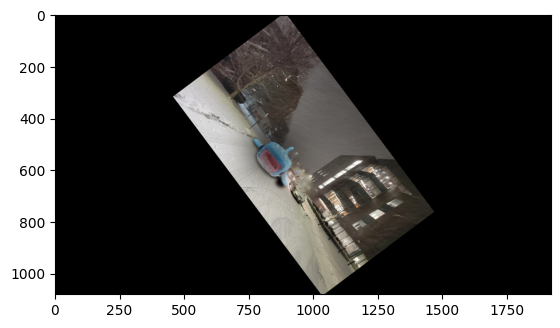

In [ ]:
# PART 2

# TRANSFORMATION MATRIX FOR PART 2
"""
STANDARD MATRIX IS:
[-0.6 0.8]
[0.8 0.6]
"""
mat2 = np.array([
    [-0.6, 0.8],
    [0.8, 0.6]
])

# MAKING IMAGE 2

image_2_np = image_tranform(image_1_np, mat2)
image_2 = Image.fromarray(image_2_np)
plt.imshow(image_2)
plt.show()

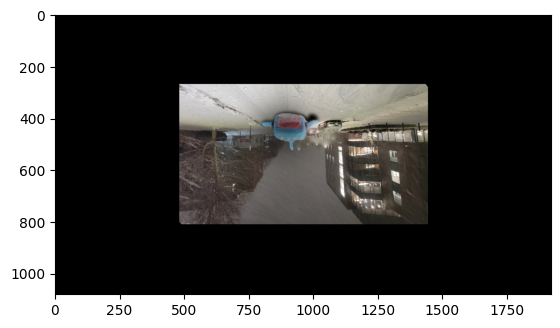

In [ ]:
# PART 3

# TRANSFORMATION MATRIX FOR PART 3
"""
STANDARD MATRIX IS:
[0.6 -0.8]
[-0.8 -0.6]
"""
mat3 = np.array([
    [0.6, -0.8],
    [-0.8, -0.6]
])

# MAKING IMAGE 3

image_3_np = image_tranform(image_2_np, mat3)
image_3 = Image.fromarray(image_3_np)
plt.imshow(image_3)
plt.show()

[[-0.3  0.4]
 [ 0.4  0.3]]


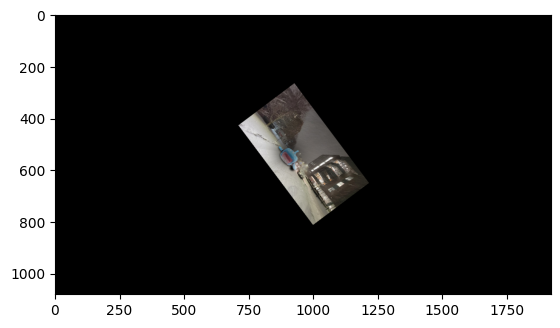

In [ ]:
# PART 4

# COMPOSE T2(T1) to find standard matrix of T

stand_mat_t = mat2@mat1
print(stand_mat_t)
""""
STANDARD MATRIX OF T
[-0.3 0.4]
[0.4 0.3]
"""

# APPLY T TO IMAGE1
image_1T_np = image_tranform(image_1_np, stand_mat_t)
image_1T = Image.fromarray(image_1T_np)
plt.imshow(image_1T)
plt.show()

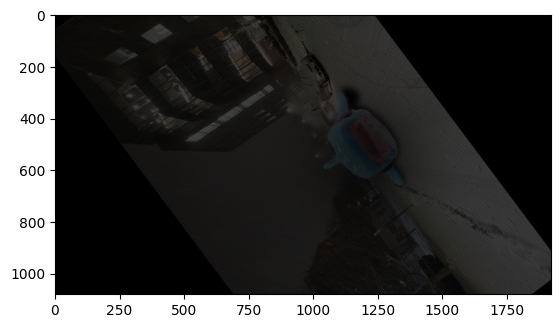

In [ ]:
# PART 5

# FIND INVERSE OF T and its standard matrix

#matrix_t = Matrix(stand_mat_t)
#print(matrix_t)
#stand_mat_t_inv = matrix_t.inv()
#print(stand_mat_t_inv)
stand_mat_t_inv = np.array([
    [-1.2, 1.6],
    [1.6, 1.2]
])
""""
STANDARD MATRIX OF T-INVERSE
= THE INVERSE OF THE STANDARD MATRIX OF T
[-1.2 1.6]
[ 1.6 1.2]
"""

# APPLY T-INVERSE TO IMAGE 3
image_1TINV_np = image_tranform(image_3_np, stand_mat_t_inv)
image_1TINV = Image.fromarray(image_1TINV_np)
plt.imshow(image_1TINV)
plt.show()

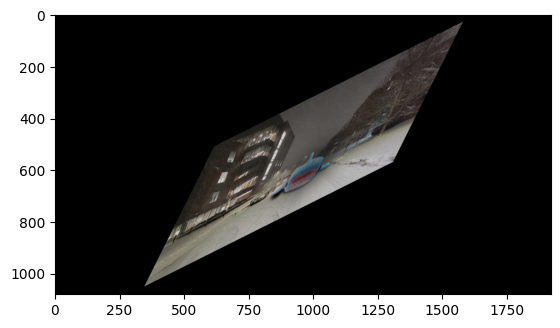

In [ ]:
# PART 6

# STANDARD MATRIX FOR MY FAVORITE TRANSFORMATION
""""
[1 0.5]
[0.5 1]
"""
mat4 = np.array([
    [1, 0.5],
    [0.5, 1]
])

# MAKING IMAGE 4

image_4_np = image_tranform(image_1_np, mat4)
image_4 = Image.fromarray(image_4_np)
plt.imshow(image_4)
plt.show()